# CISC-873-DM-W23-A4 ❤️
## This Notebook is divided into two parts:
#### 1. Answring some questions about data mining subject. 🤓
#### 2. A4 Airbnb price category prediction. 📈
##### Kaggle account name: Manar Elghobashy.

## 1. Answring some questions about data mining subject🤓:
-----------------------------------------------------------------------
### Q1: Is fully-connected model a good one for sequential data? Why? How about for image data? Is it good? Why?
**part 1:  Is fully-connected model a good one for sequential data? Why?**
* No, Recurrent neural network works best for sequential data.
* A **fully connected** layer each neuron is connected to every neuron in the previous layer, and each connection has it's own weight. This is a totally general purpose connection pattern and makes no assumptions about the features in the data. It's also very expensive in terms of memory (weights) and computation (connections). the model is stateless, also since the sequential data is dependent on each other, but the fully-connected model assumes that the data is non-sequential, it isloate features from each other and start training each feature alone
* **RNNs** are an excellent choice for modeling sequential data such as text because they use an internal state to process the sequence. Having an internal state/memory of how the inputs are related to one another is crucial for modeling the data effectively. RNN’s can remember important things about the input they received, which allows them to be very precise in predicting what’s coming next. This is why they're the preferred algorithm for sequential data like time series, speech, text, financial data, audio, video, weather and much more.

**part 2: How about for image data? Is it good? Why?**
* it's not good for image preprocessing and classification, because it's not good at image feature extraction, and there will be a lot of learnable parameters and that may cause overfitting.
* The number of parameters in a neural network grows rapidly with the increase in the number of layers. This can make training for a model computationally heavy (and sometimes not feasible). Tuning so many of parameters can be a very huge task face several problems, for e.g. slower training time, chances of overfitting e.t.c. The time taken for tuning these parameters is diminished by CNNs. So, Convolutional neural network works best for image data.
* CNNs are trained to identify and extract the best features from the images for the problem at hand. CNNs are very effective in reducing the number of parameters without losing on the quality of models. The main functional difference of convolution neural network is that, the main image matrix is reduced to a matrix of lower dimension in the first layer.
-------------------------------------------------------------------------------
### Q2: What is gradient vanishing and gradient explosion, and how GRU/LSTM tries to mitigate this problem?
* **Vanishing gradients** : occur when the values of a gradient are too small and the model stops learning or takes way too long as a result. This was a major problem much harder to solve than the exploding gradients. Fortunately, it was solved through the concept of LSTM by Sepp Hochreiter and Juergen Schmidhuber.
* **Exploding gradients** : are when the algorithm, without much reason, assigns a stupidly high importance to the weights.
* There are two factors that affect the magnitude of gradients - the weights and the activation functions (or more precisely, their derivatives) that the gradient passes through.
* LSTMs solve the vanishing gradient problem using a unique additive gradient structure that includes direct access to the forget gate’s activations, enabling the network to encourage desired behaviour from the error gradient using frequent gates update on every time step of the learning process.
* both **GRUs** and **LSTMs** help solve the problem that was first encountered when RNNs were used,which called exploding and vanishing gradients. Because of the recurrent application of the same parameters, it was often the case that gradients would quickly go to zero (not useful) or to infinity (also not useful), meaning that backpropagation was challenging or even impossible as the recurrent network was unrolled. This problem was addressed with GRU and LSTM because these tend to keep inputs and outputs from the cell in tractable value ranges. This is due both to the form of the activation function they use and to the way that the update gate can learn to pass information through or not, leading to reasonable gradient values being much more likely than in a vanilla RNN cell, which has no notion of a gate.
-------------------------------------------------------------------------------
### Q3: What is multi-objective/multi-task learning? What is multi-modality learning? How do you use them in this assignment?
* **Multi-task learning (MTL)** : is a subfield of machine learning in which multiple learning tasks are solved at the same time, while exploiting commonalities and differences across tasks. This can result in improved learning efficiency and prediction accuracy for the task-specific models, when compared to training the models separately.Early versions of MTL were called "hints". this method provides benefits like improved data efficiency, reduced overfitting through shared representations, and fast learning by leveraging auxiliary information.
* **Multi-modality learning** : is a good model to represent the joint representations of different modalities. The multimodal learning model is also capable of supplying a missing modality based on observed ones. The multimodal learning model combines two deep Boltzmann machines, each corresponding to one modality. An additional hidden layer is placed on top of the two Boltzmann Machines to produce the joint representation. multiple types of modalities are image, video, text, audio, body gestures, facial expressions, and physiological signals.
* In this notebook, I apply multi-tasking and multi-modal learning.
  * multi-modality learning (inputs):
    * text.
    * images.
  * multi-tasks learning (outputs):
    * Different areas Types (text).
    * Price of areas (number).
--------------------------------------------------------------------------------
### Q4: What is the difference among xgboost, lightgbm and catboost?
* **XGBoost** : uses the gradients of different cuts to select the next cut, but XGBoost also uses the hessian, or second derivative, in its ranking of cuts. Computing this next derivative comes at a slight cost, but it also allows a greater estimation of the cut to use.

* **LightGBM** : is a boosting technique and framework developed by Microsoft. The framework implements the LightGBM algorithm and is available in Python, R, and C. LightGBM is unique in that it can construct trees using Gradient-Based One-Sided Sampling, or GOSS for short.
* **Catboost** : offers a new technique called Minimal Variance Sampling (MVS), which is a weighted sampling version of Stochastic Gradient Boosting. Catboost provides the Minimal Variance Sample (MVS) technique, which is a weighted sampling variation of Stochastic Gradient Boosting,

--------------------------------------------------------------------------------

## problem definition:
One of the biggest problems when people prepare to post a new listing on airbnb is, how much should one ask for? Of course the most intuitive way is to check how other similar postings price their apartment/house. So in this project, we are going to predict the listing price based on the listing characteristics 🔥, in this way to optimize user experience and lower the bar to be a new host 😍!

Predicting the actual price could be simple, so we cut the pricing into 3 different bins for classification. For each listing, we recommend a pricing range to the new host rather than a fix price (how nice is that!). So we define 3 categories: beginner, plus, premium based on the created listing. Respectively we use 0, 1, 2 to denote these 3 categories.

The dataset contains listings of different areas in Montreal during 2019. It comes with rich information for each listing, including a link to the thumbnails etc.

Note: We will follow a multi-objective (multi-task) multi-modality solution.

--------------------------------------------------------------------------------
Challengs:
* The size of training dataset is approximately equal to test dataset and it will be smaller when we drop null and duplicated values from training dataset.
* Null values in summary feature in training dataset.
* summary feature in both training dataset and test dataset is multilingual.
imbalanced labels distribution.
* multi-prediction problem.
* huge time taken to train with cpu.
--------------------------------------------------------------------------------
Impact:
* It will help hosts to put the true and suitable price for their residence place and that will increase their sales, also it will help guests to predict the night price for the place that they are looking for it to stay in it at holidays or in the work trip days.
--------------------------------------------------------------------------------
**Experimental protocol:**

**1. loading data:**
  * import required libraries.
  * load train and test data.
  

**2.preprocessing the data:**
  * translate text data. (summary feature).
  * remove null and duplicated values from summary feature in training dataset.
  * translate summary feature (because it's multilingual data).
  * resize images into (64*64*3) shape (to preserve more features as we could).
  * tokenize each text data in summary feature.
  * convert each text into unique id sequence.
  * slove imbalancing problem.
  * preprocessing the data to build a pre-trained model.
  * translate text data. (summary feature).
  * remove null and duplicated values from summary feature in training dataset.
  * translate summary feature (because it's multilingual data).
  * tokenize each text data in summary feature with pre-trained tokenizer.
  * convert each text into unique id sequence.

**3.build models and plot them:**
  * train each model.
  * plot each model on training loss and validation loss.
  * plot each model on training accuracy and validation accuracy.
  -------------------------------------------------------------------------------

## **1. loading the data**

### import required libraries

In [ ]:
import os
import pandas as pd # data processing, CSV file I/O.
from tqdm.notebook import tqdm #show progress bar
from PIL import Image
import numpy as np # linear algebra library
from ast import literal_eval
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from pprint import pprint
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from keras import optimizers , Sequential
from keras.optimizers import Adam, SGD, RMSprop, Nadam
from __future__ import absolute_import, division, print_function, unicode_literals
import collections
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D, Flatten, Dense, MaxPool2D , Dropout , LSTM , GRU, Embedding , Bidirectional , TimeDistributed, SpatialDropout1D
import zipfile
from google.colab import drive     
import re
import string
import numpy as np
import pandas as pd
from tqdm.auto import tqdm

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/copy-of-cisc-873-dm-w23-a4.zip'

Streaming output truncated to the last 5000 lines.
  inflating: a4/img_train/3366.jpg   
  inflating: a4/img_train/3367.jpg   
  inflating: a4/img_train/3368.jpg   
  inflating: a4/img_train/3369.jpg   
  inflating: a4/img_train/337.jpg    
  inflating: a4/img_train/3370.jpg   
  inflating: a4/img_train/3371.jpg   
  inflating: a4/img_train/3372.jpg   
  inflating: a4/img_train/3373.jpg   
  inflating: a4/img_train/3374.jpg   
  inflating: a4/img_train/3375.jpg   
  inflating: a4/img_train/3376.jpg   
  inflating: a4/img_train/3377.jpg   
  inflating: a4/img_train/3378.jpg   
  inflating: a4/img_train/3379.jpg   
  inflating: a4/img_train/338.jpg    
  inflating: a4/img_train/3380.jpg   
  inflating: a4/img_train/3381.jpg   
  inflating: a4/img_train/3382.jpg   
  inflating: a4/img_train/3383.jpg   
  inflating: a4/img_train/3384.jpg   
  inflating: a4/img_train/3385.jpg   
  inflating: a4/img_train/3386.jpg   
  inflating: a4/img_train/3387.jpg   
  inflating: a4/img_train/3388.jpg   

In [ ]:
#read train & test files
train_data  = pd.read_csv('a4/train_xy.csv')
test_data =pd.read_csv('a4/test_x.csv' , index_col='id')

## **2. preprocessing the data:**

### text data preprocessing

In [ ]:
train_data.head()

,summary,image,type,price
0,"Spacious, sunny and cozy modern apartment in t...",img_train/0.jpg,Apartment,1
1,Located in one of the most vibrant and accessi...,img_train/1.jpg,Apartment,0
2,Logement coquet et douillet à 10 minutes du ce...,img_train/2.jpg,Apartment,1
3,"Beautiful and spacious (1076 sc ft, / 100 mc) ...",img_train/3.jpg,Apartment,1
4,Très grand appartement ''rustique'' et très ag...,img_train/4.jpg,Apartment,0


In [ ]:
#display the sum of null values in every columns.
train_data.isnull().sum()

summary    301
image        0
type         0
price        0
dtype: int64

In [ ]:
# drop null values from training data.
train_data.dropna(inplace=True) 

In [ ]:
#check that every null value has been dropped.
train_data.isnull().sum()

summary    0
image      0
type       0
price      0
dtype: int64

In [ ]:
#check if there is any null values in the testing data.
test_data.isnull().sum()

summary    0
image      0
dtype: int64

In [ ]:
#check duplications in the training data.
train_data.duplicated().sum()

0

In [ ]:
print('the shape of training data is:',train_data.shape)
print('the shape of testing data is:',test_data.shape)

the shape of training data is: (7326, 4)
the shape of testing data is: (7360, 2)


In [ ]:
#see the count of every label to check the balance of the data.
train_data['price'].value_counts()

0    4546
1    2312
2     468
Name: price, dtype: int64

* i observered that the data is imbalanced.

In [ ]:
train_data['summary'][0]

'Spacious, sunny and cozy modern apartment in the heart of Montreal. This 3 bedroom centrally located in the very popular Plateau Mont-royal neighborhood in the middle of prince-arthur pedestrian-only street. Close to all amenities ( Restaurants, coffee house, bars, clubs, shopping, universities, subway stations). Experience Montreal like a real local resident, be in the heart of the action: grand prix week, grill Saint-Laurent festival, mural 2019 and so much more!'

In [ ]:
!pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 61.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 10.6 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16368 sha256=f93fc756a7afd16b2d5a1afd483ec4dfed4285a1df5e847c01c24cfad973a7e0
  Stored in directory: /root/.cache/pip/wheels/ae/e1/6c/5137bc3f35aa130deea71575e165cc4f4f0680a88f3d90a636
Successfully built googletrans

In [ ]:
from googletrans import Translator
#take object from the class translator
translator = Translator()
#apply the translation process on train & test data and put the result in new column('translate_text')
#we got the text part only by adding(.text) to translator object
train_data['translate_text']= train_data['summary'].apply(lambda x: translator.translate(x,lang_tgt='en').text)
test_data['translate_text']= train_data['summary'].apply(lambda x: translator.translate(x,lang_tgt='en').text)

In [ ]:
train_data['type'] = train_data['type'].astype('category').cat.codes
train_data['price'] = train_data['price'].astype('category').cat.codes # price category/label, either 0, 1, or 2 corresponding to beginner, plus, or premium respectively

# get the total number of unique outputs (later used for prediction)
len_type = len(train_data['type'].unique())    # number of unique labels for rental type
len_price = len(train_data['price'].unique())  # number of unique labels for price 

# get type 
y_train_type = train_data['type']

# get price
y_train = train_data['price']

# print them so we can see the unique values for our labels
print('unique values for type category', len_type, y_train_type.unique())
print('unique values for price category', len_price, y_train.unique()) 


unique values for type category 24 [ 1 17 22 10 18 20  8  4 23  2  5 13 15 16 14 11 19  0 21  3  6 12  7  9]
unique values for price category 3 [1 0 2]


In [ ]:
# loading summary: (force convert some of the non-string cell to string)
x_train_text = train_data['summary'].astype('str')


In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter 
# take a copy from the training features and labels to apply oversampling on. 
y_train= train_data['price']
X_train =train_data.drop(['price'],axis=1)
y_type=train_data['type']
oversample = RandomOverSampler(sampling_strategy='minority')
# fit the oversapmling on the copied train feature and label.
X_train , y_train_price = oversample.fit_resample(X_train, y_train)
#X_train , y_train_type = oversample.fit_resample(X_train, y_type)
# display the count of classes before and after the oversampling.
print('Original dataset shape:', Counter(y_train_price))
print('Resampple dataset shape:', Counter(y_train))

Original dataset shape: Counter({0: 4546, 2: 4546, 1: 2312})
Resampple dataset shape: Counter({0: 4546, 1: 2312, 2: 468})


### loading images

In [ ]:
#function to load the images,
#convert them to (black and white) with ALPHA(transparency)--> ('LA mode'), 
#resize them to shape(64,64),
#convert them to arrays of pixels
def load_image(file):
    try:
        image = Image.open(
            file
        ).convert('LA').resize((64, 64)) # read each image as a greyscale image size (64x64x2)
        arr = np.array(image)
    except:
        arr = np.zeros((64, 64,2))       # if an image can't be loaded, return an array of zeros (same size: 64x64x2)
    return arr

  0%|          | 0/7326 [00:00<?, ?it/s]

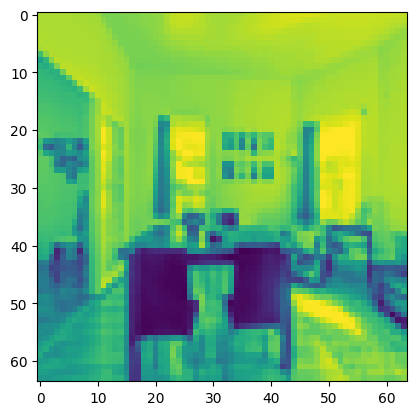

In [ ]:
x_train_image = np.array([load_image('/content/a4/'+i) for i in tqdm(train_data['image'])])
plt.imshow(x_train_image[0, :, :, 0])

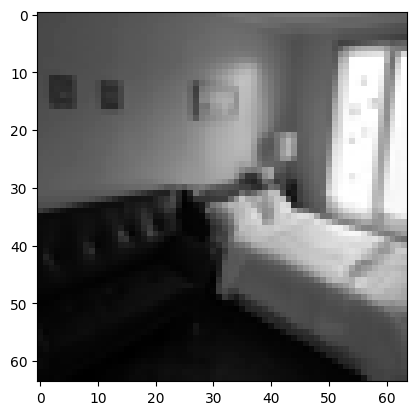

In [ ]:
plt.imshow(x_train_image[20, :, :, 0],cmap='gray')

### preparing data

In [ ]:
# preprocess text data
vocab_size = 45000   # enforce a threshold on the number of unique words that are tokenized
max_len = 300        # maximum sequence length of a text string, anything longer will be truncated to 300 words


# build vocabulary from training set
tokenizer = Tokenizer(num_words=vocab_size)         # initialize tokenizer with a vocabulary size of 45000
tokenizer.fit_on_texts(x_train_text)                # Updates internal vocabulary based on a list of sequences.


def _preprocess(list_of_text):
    return pad_sequences(
        tokenizer.texts_to_sequences(list_of_text), #Transforms each text in texts to a sequence of integers.
                                                    #Only top num_words-1 most frequent words will be taken into account. 
                                                    #Only words known by the tokenizer will be taken into account.
        
        maxlen=max_len, #Optional Int, maximum length of all sequences. 
                        #If not provided, sequences will be padded to the length of the longest individual sequence.
        
        padding='post', #takes one of 2 values('pre' or 'post') ---> 'pre' is the default value: pad either before or after each sequence.
    )

# preprocess and tokenize list of training sequences(padding is done inside): 
x_train_text_id = _preprocess(x_train_text) 

#print the shape of new data after applying the preprocessing on it
print(x_train_text_id.shape)

(7326, 300)


In [ ]:
x_train_text_id

array([[ 124,  308,    2, ...,    0,    0,    0],
       [  23,    5,   71, ...,    0,    0,    0],
       [ 133, 2329,    9, ...,    0,    0,    0],
       ...,
       [  27,   16,    8, ...,    0,    0,    0],
       [  55,    8,    3, ...,    0,    0,    0],
       [ 141, 2557,  324, ...,    0,    0,    0]], dtype=int32)

## **3. build models and plot them:**

### trial 1:
* use tokenization only on text as it contains some text preprocessing and one convolutional layer with some small number of filters on images with max pooling layer after that.
* this model care more about price not type labels and cover the convolutional and dropout layers.
* i think that this model will achieve reasonable accuracy on the price labels prediction.

In [ ]:
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))                  # input shape for batches of text sequences (300 words long)
in_image = keras.Input(batch_shape=(None, 64, 64, 2))               # input shape for batches of images (size: 64x64x2)

# text part
# simple average of embedding. 
embedded = keras.layers.Embedding(tokenizer.num_words, 300)(in_text) # get our word embeddings
averaged = tf.reduce_mean(embedded, axis=1)                          # compute the mean of the embeddings to reduce the rank of the embedding

# image part 
# simple conv2d.
cov1 = Conv2D(10, (16, 16) , activation='relu')(in_image)           # convolutional layer with 10 filters, and a 16x16 mask, no padding
pl = MaxPool2D((16, 16))(cov1)                                      # max pooling with a 16x16 mask, reducing the size to 3x3x10
flattened = Flatten()(pl)                                           # flatten the shape to (90,)

# fusion - combinig both
fused = tf.concat([averaged, flattened], axis=-1)                   # concatenate text features with images

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model = keras.Model(
    inputs={
        'summary': in_text,  # text inputs
        'image': in_image    # images inputs
    },
    outputs={
        'type': p_type,      # label 1: type category [0-23]
        'price': p_price     # label 2: price category (0, 1, or 2)
    }
)


# compile model with optimizer, loss values for each task, 
# loss weights for each task.
model.compile(
    optimizer=Adam(.001),       # using Adam for optimization with learning rate (.001)

    # measuring sparse categorical cross-entropy loss for both price and type labels
    # sparse categorical cross-entropy is used since our labels are integers
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    # Not equally weight the loss w.r.t. both labels as we care more with price
    loss_weights={
        'type': 0,
        'price': 1.0,       
    },
    # evaluation metric for this task is accuracy, so we measure sparse categorical accuracy for both targets
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)

# display the structure of the model that we defined  
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 49, 49, 10)   5130        ['input_2[0][0]']                
                                                                                                  
 embedding (Embedding)          (None, 300, 300)     13500000    ['input_1[0][0]']                
                                                                                              

In [ ]:
history = model.fit(
    # our inputs: tokenized text sequences and resized image samples
    x={
        'summary': x_train_text_id,
        'image': x_train_image
    },
    # our outputs: price and rental type categories
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=30,            # train for 30 epochs (iterations over all training data)
    batch_size=16,        # batch size of 16 (samples processed before updating gradients)
    validation_split=0.2, # we set our validation splits percentage for our two input sets and our two target attributes is .20%
    # use early stopping, monitor the validation price loss and if it does not improve for 10 consecutive epochs, training will stop
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=5)
    ],
    verbose=1            # one line per epoch displaying performance metrics
)
     

Epoch 1/30
367/367 [==============================] - 14s 15ms/step - loss: 1.2093 - price_loss: 1.2093 - type_loss: 6.1578 - price_sparse_categorical_accuracy: 0.6082 - type_sparse_categorical_accuracy: 0.0089 - val_loss: 0.8066 - val_price_loss: 0.8066 - val_type_loss: 3.2536 - val_price_sparse_categorical_accuracy: 0.6241 - val_type_sparse_categorical_accuracy: 0.0143
Epoch 2/30
367/367 [==============================] - 4s 12ms/step - loss: 0.7999 - price_loss: 0.7999 - type_loss: 3.2515 - price_sparse_categorical_accuracy: 0.6305 - type_sparse_categorical_accuracy: 0.0126 - val_loss: 0.7716 - val_price_loss: 0.7716 - val_type_loss: 3.2531 - val_price_sparse_categorical_accuracy: 0.6385 - val_type_sparse_categorical_accuracy: 0.0130
Epoch 3/30
367/367 [==============================] - 4s 12ms/step - loss: 0.7448 - price_loss: 0.7448 - type_loss: 3.2470 - price_sparse_categorical_accuracy: 0.6594 - type_sparse_categorical_accuracy: 0.0143 - val_loss: 0.7321 - val_price_loss: 0.7321

In [ ]:
# helper functions (adopted from template code, as usual)

# method used to plot history after training to explore model behaviour
def visualization(history):

  # generate a figure containing 3 plots displayed horizontally
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))
  fig.suptitle('Model Results', fontsize='large',fontweight='bold')
  
  # first we display the training price accuracy vs. the validation price accuracy
  ax1.plot(history.history['price_sparse_categorical_accuracy'])
  ax1.plot(history.history['val_price_sparse_categorical_accuracy'])
  ax1.set_title('price accuracy')
  ax1.set_ylabel('accuracy')
  ax1.set_xlabel('epoch')
  ax1.legend(['train_price', 'validation_price'], loc='upper left')

  # same with the other specified accuracy metric, type accuracy
  ax2.plot(history.history['type_sparse_categorical_accuracy'])
  ax2.plot(history.history['val_type_sparse_categorical_accuracy'])
  ax2.set_title('type accuracy')
  ax2.set_ylabel('accuracy')
  ax2.set_xlabel('epoch')
  ax2.legend(['train_type', 'validation_type'], loc='upper left')

  # on the last axis, we plot the training loss against the validation loss (w.r.t. price and type combined)
  ax3.plot(history.history['loss'])
  ax3.plot(history.history['val_loss'])
  ax3.set_title('model loss')
  ax3.set_ylabel('loss')
  ax3.set_xlabel('epoch')
  ax3.legend(['train', 'validation'], loc='upper left')

  # display the figure
  plt.show() 
     

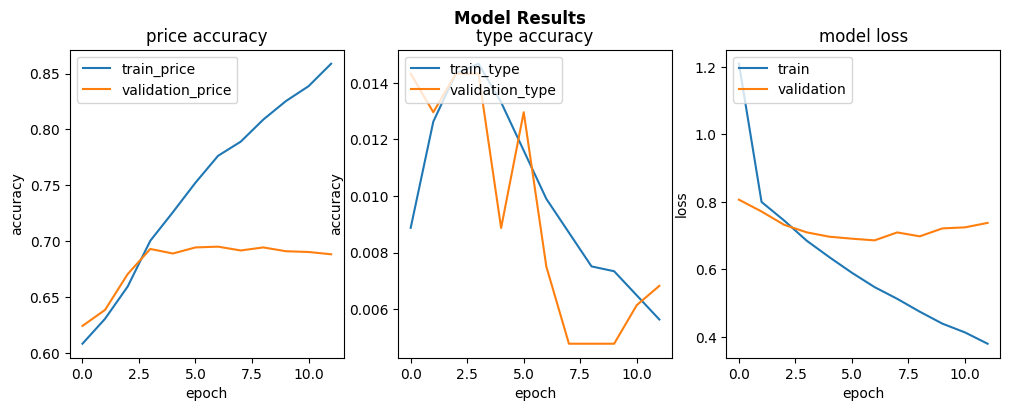

In [ ]:
visualization(history)


In [ ]:
# loading images:
x_test_image = np.array([load_image(i) for i in tqdm(test_data['image'])])  # load and resize the images from the test set

# loading summary: (force convert some of the non-string cell to string)
x_test_text = _preprocess(test_data['summary'].astype('str'))                # create sequences for the text summaries in the test set
     

  0%|          | 0/7360 [00:00<?, ?it/s]

In [ ]:
# we can do prediction on training set
y_predict = model.predict(
    {
        'summary': x_test_text,
        'image': x_test_image
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)     # probability the sample belongs to each of the categories

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)  # pick the highest value, and assign it as the predicted class
print(price_category_predicted)                                # print the categorical predictions, which are in [0,1,2]


230/230 [==============================] - 1s 2ms/step
[[0.73264927 0.2366139  0.03073677]
 [0.9867198  0.0106285  0.00265178]
 [0.96436024 0.02267524 0.01296459]
 ...
 [0.69554454 0.28154653 0.02290891]
 [0.9957645  0.00303869 0.00119672]
 [0.7821692  0.19526848 0.02256227]]
[0 0 0 ... 0 0 0]


In [ ]:

# create the submission dataframe/csv for submissionpd.
pd.DataFrame(
    {'id': test_data.index,
     'price': price_category_predicted}
            ).to_csv('trail1.csv', index=False)

* this model have a price accuracy of 0.8589 and a validation accuracy of 0.6883 in training.
*on kaggle this model has an accuracy of 0.68043 in public score.
* observation, this model has the best score on kaggle submissions.
--------------------------------------------------------------------------------

### trial 2 using translation:
* We will apply english translation over our data to unify our language to english and use the rest operations as the previous trial.
* same here this model care more about price not type labels and cover convolutional and droupout layers.

In [ ]:
# loading images:
x_train_image = np.array([load_image(i) for i in tqdm(train_data['image'])])

# loading summary: (force convert some of the non-string cell to string)
x_train_text = train_data['translate_text'].astype('str')
# preprocess and tokenize list of training sequences(padding is done inside): 
x_train_text_id = _preprocess(x_train_text) 

  0%|          | 0/7326 [00:00<?, ?it/s]

In [ ]:
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
# simple average of embedding. 
embedded = keras.layers.Embedding(tokenizer.num_words, 300)(in_text)
averaged = tf.reduce_mean(embedded, axis=1)

# image part 
# simple conv2d.
cov1 = Conv2D(10, (16, 16) , activation='relu')(in_image) # 10 number of filters and  (16, 16) size of filter
pl = MaxPool2D((16, 16))(cov1)
flattened = Flatten()(pl)

# fusion - combinig both
fused = tf.concat([averaged, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    }
)


# compile model with optimizer, loss values for each task, 
# loss weights for each task.
model.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0,
        'price': 1.0,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 conv2d_1 (Conv2D)              (None, 49, 49, 10)   5130        ['input_4[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 300, 300)     13500000    ['input_3[0][0]']                
                                                                                            

In [ ]:
history = model.fit(
    x={
        'summary': x_train_text_id,
        'image': x_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=30,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=10)
    ],
    verbose=1
)

Epoch 1/30
367/367 [==============================] - 6s 14ms/step - loss: 0.8426 - price_loss: 0.8426 - type_loss: 3.1562 - price_sparse_categorical_accuracy: 0.6181 - type_sparse_categorical_accuracy: 0.0514 - val_loss: 0.8077 - val_price_loss: 0.8077 - val_type_loss: 3.1580 - val_price_sparse_categorical_accuracy: 0.6241 - val_type_sparse_categorical_accuracy: 0.0498
Epoch 2/30
367/367 [==============================] - 4s 12ms/step - loss: 0.7917 - price_loss: 0.7917 - type_loss: 3.1599 - price_sparse_categorical_accuracy: 0.6299 - type_sparse_categorical_accuracy: 0.0522 - val_loss: 0.7631 - val_price_loss: 0.7631 - val_type_loss: 3.1617 - val_price_sparse_categorical_accuracy: 0.6467 - val_type_sparse_categorical_accuracy: 0.0498
Epoch 3/30
367/367 [==============================] - 6s 17ms/step - loss: 0.7344 - price_loss: 0.7344 - type_loss: 3.1626 - price_sparse_categorical_accuracy: 0.6666 - type_sparse_categorical_accuracy: 0.0520 - val_loss: 0.7267 - val_price_loss: 0.7267 

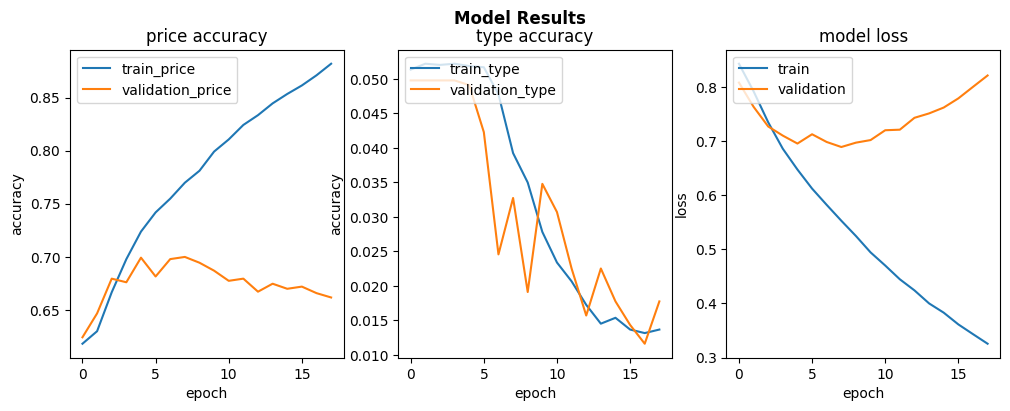

In [ ]:
visualization(history)

In [ ]:
# loading images:
x_test_image = np.array([load_image(i) for i in tqdm(test_data['image'])])

# loading summary: (force convert some of the non-string cell to string)
x_test_text = _preprocess(test_data['summary'].astype('str'))

  0%|          | 0/7360 [00:00<?, ?it/s]

In [ ]:
# we can do prediction on training set
y_predict = model.predict(
    {
        'summary': x_test_text,
        'image': x_test_image
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

230/230 [==============================] - 1s 4ms/step
[[7.2569907e-01 2.6238114e-01 1.1919756e-02]
 [3.3252981e-01 5.8724749e-01 8.0222689e-02]
 [1.3990323e-01 5.2887136e-01 3.3122545e-01]
 ...
 [8.1559265e-01 1.7478997e-01 9.6173510e-03]
 [9.9977022e-01 1.5323091e-04 7.6566335e-05]
 [8.7600744e-01 1.1207167e-01 1.1920849e-02]]
[0 1 1 ... 0 0 0]


In [ ]:
#if for kaggle competition and it is about (price prediction)
pd.DataFrame(
    {'id': test_data.index,
     'price': price_category_predicted}
).to_csv('trail2.csv', index=False)

* this model have a price accuracy of 0.8819 and a validation accuracy of 0.6617 in training.
*on kaggle this model has an accuracy of 0.5951 in public score.

### trial 3 lstm:
* I added  a LSTM layer to between the embedded layer and averaged layer,because in terms of memory. Having a good hold over memorizing certain patterns LSTMs and it is effective in memorizing important information. so it will perform fairly better, also I added a convolution layer after the max-pooling layer to extract more features in images and one dropout layer.
* this model care about price and type equally in loss and learning. 

In [ ]:
keras.backend.clear_session()

# text part
# simple average of embedding. you can change it to anything else as needed

embedded = keras.layers.Embedding(tokenizer.num_words, 300)(in_text)
lstm = LSTM(units = 128,return_sequences=True)(embedded)
averaged = tf.reduce_mean(lstm, axis=1)
print(averaged)

# image part 
# simple conv2d. you can change it to anything else as needed
cov = Conv2D(32, (7, 7))(in_image)
dropout_cov = Dropout(rate=0.2)(cov)
pl = MaxPool2D((8, 8))(dropout_cov)
cov_2 = Conv2D(32, (5, 5))(pl)

flattened = Flatten()(cov_2)


# fusion - combinig both
fused = tf.concat([averaged , flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task

fused1 = Dense(128, activation='relu')(fused)
dropout_1 = Dropout(rate = 0.2)(fused1)
fused1 = Dense(256, activation='relu')(dropout_1)


fused2 = Dense(256, activation='relu')(fused)
dropout_2 = Dropout(rate = 0.3)(fused2)
fused2 =  Dense(128, activation='relu')(dropout_2)

p_type = Dense(len_type, activation='softmax', name='type')(fused1)
p_price = Dense(len_price, activation='softmax', name='price')(fused2)


# define model input/output using keys.
third_model = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)


# compile model with optimizer, loss values for each task, loss 
# weights for each task.
third_model.compile(
    optimizer=Nadam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.5,
        'price': 0.5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


third_model.summary()


KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='tf.math.reduce_mean/Mean:0', description="created by layer 'tf.math.reduce_mean'")
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 58, 58, 32)   3168        ['input_4[0][0]']                
                                                                                                  
 input_3 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 dropout (Dropout)    

In [ ]:
history_2 = third_model.fit(
    x={
        'summary': x_train_text_id,
        'image': x_train_image
    },

    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=30,
    batch_size=64,
    validation_split = 0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_price_sparse_categorical_accuracy', patience=5, )],
    verbose=1
)

Epoch 1/30
92/92 [==============================] - 9s 46ms/step - loss: 1.0003 - price_loss: 0.8527 - type_loss: 1.1478 - price_sparse_categorical_accuracy: 0.6118 - type_sparse_categorical_accuracy: 0.7474 - val_loss: 0.8987 - val_price_loss: 0.8618 - val_type_loss: 0.9357 - val_price_sparse_categorical_accuracy: 0.6241 - val_type_sparse_categorical_accuracy: 0.7688
Epoch 2/30
92/92 [==============================] - 3s 34ms/step - loss: 0.9010 - price_loss: 0.8308 - type_loss: 0.9712 - price_sparse_categorical_accuracy: 0.6186 - type_sparse_categorical_accuracy: 0.7560 - val_loss: 0.8709 - val_price_loss: 0.8070 - val_type_loss: 0.9348 - val_price_sparse_categorical_accuracy: 0.6241 - val_type_sparse_categorical_accuracy: 0.7694
Epoch 3/30
92/92 [==============================] - 3s 32ms/step - loss: 0.8945 - price_loss: 0.8266 - type_loss: 0.9623 - price_sparse_categorical_accuracy: 0.6188 - type_sparse_categorical_accuracy: 0.7558 - val_loss: 0.8944 - val_price_loss: 0.8322 - val_

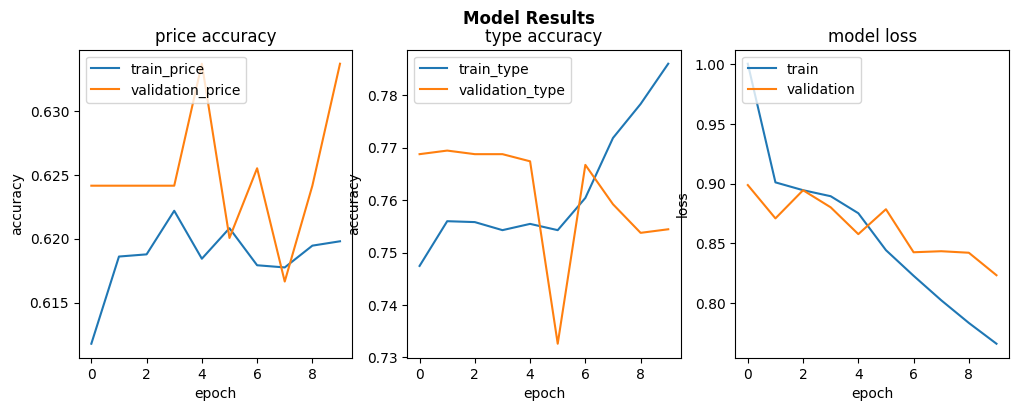

In [ ]:
visualization(history_2)

In [ ]:
# we can do prediction on training set
y_predict = third_model.predict(
    {
        'summary': x_test_text,
        'image': x_test_image
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

230/230 [==============================] - 2s 6ms/step
[[0.33488536 0.3305868  0.33452785]
 [0.33501673 0.33019412 0.33478913]
 [0.33491912 0.33036187 0.33471906]
 ...
 [0.33498013 0.3302524  0.33476746]
 [0.33500054 0.33041334 0.3345861 ]
 [0.33503813 0.3306239  0.33433795]]
[0 0 0 ... 0 0 0]


In [ ]:
#if for kaggle competition and it is about (price prediction)
pd.DataFrame(
    {'id': test_data.index,
     'price': price_category_predicted}
).to_csv('trail3.csv', index=False)

* this model have a price accuracy of 0.6198 and a validation accuracy of 0.6337 in training.
* this model have a type accuracy of 0.7860 and a validation accuracy of 0.7544 in training.
* on kaggle this model has an accuracy of 0.5785 in public score.

### trial 4 bidirectional:
* the same as previous trail except replacing lstm layer with bi-directional lasm layer.


In [ ]:
keras.backend.clear_session()
# loading images:
x_train_image = np.array([load_image(i) for i in tqdm(train_data['image'])])

# loading summary: (force convert some of the non-string cell to string)
x_train_text = train_data['translate_text'].astype('str')


  0%|          | 0/7326 [00:00<?, ?it/s]

In [ ]:
x_train_text_id = _preprocess(x_train_text) 


In [ ]:
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
# simple average of embedding. 
embedded = keras.layers.Embedding(tokenizer.num_words, 300)(in_text)
dropout= Dropout(.4)(embedded)
bi_directional =  Bidirectional(LSTM(5))(dropout)

# image part 
# simple conv2d.
cov1 = Conv2D(10, (16, 16) , activation='relu')(in_image) # 10 number of filters and  (15, 15) size of filter
dropout = Dropout(.4)(cov1)
pl = MaxPool2D((16, 16))(dropout)
flattened = Flatten()(pl)

# fusion - combinig both
fused = tf.concat([bi_directional, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    }
)


# compile model with optimizer, loss values for each task, 
# loss weights for each task.
model.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.5,
        'price': 0.5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 49, 49, 10)   5130        ['input_2[0][0]']                
                                                                                                  
 embedding (Embedding)          (None, 300, 300)     13500000    ['input_1[0][0]']                
                                                                                              

In [ ]:
history = model.fit(
    x={
        'summary': x_train_text_id,
        'image': x_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=30,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=5)
    ],
    verbose=1,
    # class_weight = class_weight
)

Epoch 1/30
367/367 [==============================] - 17s 32ms/step - loss: 1.1494 - price_loss: 0.8661 - type_loss: 1.4326 - price_sparse_categorical_accuracy: 0.6092 - type_sparse_categorical_accuracy: 0.7527 - val_loss: 0.9026 - val_price_loss: 0.8270 - val_type_loss: 0.9781 - val_price_sparse_categorical_accuracy: 0.6241 - val_type_sparse_categorical_accuracy: 0.7688
Epoch 2/30
367/367 [==============================] - 11s 30ms/step - loss: 0.8989 - price_loss: 0.8261 - type_loss: 0.9717 - price_sparse_categorical_accuracy: 0.6196 - type_sparse_categorical_accuracy: 0.7560 - val_loss: 0.8551 - val_price_loss: 0.8097 - val_type_loss: 0.9005 - val_price_sparse_categorical_accuracy: 0.6241 - val_type_sparse_categorical_accuracy: 0.7688
Epoch 3/30
367/367 [==============================] - 13s 35ms/step - loss: 0.8312 - price_loss: 0.7932 - type_loss: 0.8692 - price_sparse_categorical_accuracy: 0.6234 - type_sparse_categorical_accuracy: 0.7560 - val_loss: 0.8165 - val_price_loss: 0.76

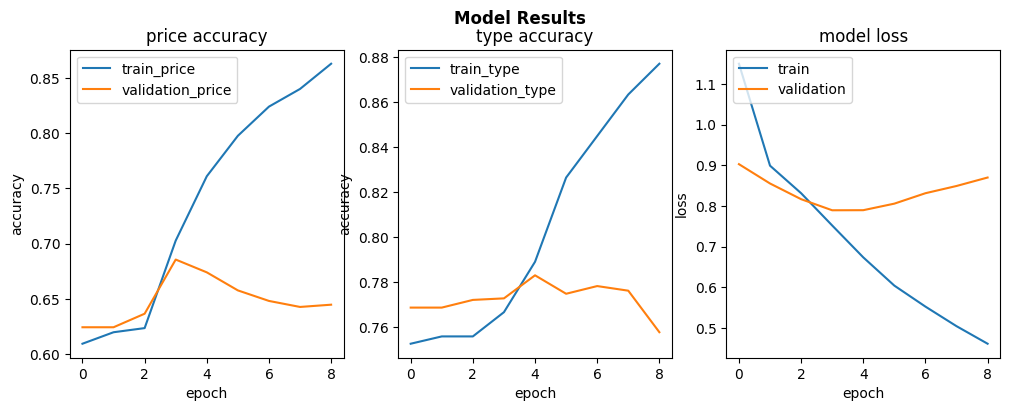

In [ ]:
visualization(history)

In [ ]:
# loading images:
x_test_image = np.array([load_image(i) for i in tqdm(test_data['image'])])

# loading summary: (force convert some of the non-string cell to string)
x_test_text = _preprocess(test_data['summary'].astype('str'))

  0%|          | 0/7360 [00:00<?, ?it/s]

In [ ]:
# we can do prediction on training set
y_predict = model.predict(
    {
        'summary': x_test_text,
        'image': x_test_image
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

230/230 [==============================] - 3s 9ms/step
[[0.16366594 0.52527    0.31106403]
 [0.15687339 0.752014   0.09111261]
 [0.34652674 0.44045892 0.2130143 ]
 ...
 [0.90722406 0.06315868 0.02961725]
 [0.9649999  0.01877912 0.01622096]
 [0.20492412 0.7146224  0.08045344]]
[1 1 1 ... 0 0 1]


In [ ]:
#if for kaggle competition and it is about (price prediction)
pd.DataFrame(
    {'id': test_data.index,
     'price': price_category_predicted}
).to_csv('trail4.csv', index=False)

* this model have a price accuracy of 0.8631 and a validation accuracy of 0.0.6446 in training.
* this model have a type accuracy of 0.8770 and a validation accuracy of 0.7578 in training.
* on kaggle this model has an accuracy of 0.5842 in public score.

### trial 5 GRU:
* the same as the previous trial but with replacing bi directional lstm layer with GRU layer.

In [ ]:
keras.backend.clear_session()
# loading images:
x_train_image = np.array([load_image(i) for i in tqdm(train_data['image'])])

# loading summary: (force convert some of the non-string cell to string)
x_train_text = train_data['translate_text'].astype('str')


  0%|          | 0/7326 [00:00<?, ?it/s]

In [ ]:
x_train_text_id = _preprocess(x_train_text) 

In [ ]:
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
# simple average of embedding. 
embedded = keras.layers.Embedding(tokenizer.num_words, 300)(in_text)
dropout= Dropout(.4)(embedded)
GRU = GRU(20)(dropout) # fewer hidden units might improve training time?

# image part 
# simple conv2d.
cov1 = Conv2D(10, (16, 16) , activation='relu')(in_image) # 10 number of filters and  (15, 15) size of filter
dropout = Dropout(.4)(cov1)
pl = MaxPool2D((16, 16))(dropout)
flattened = Flatten()(pl)

# fusion - combinig both
fused = tf.concat([GRU, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    }
)


# compile model with optimizer, loss values for each task, 
# loss weights for each task.
model.compile(
    optimizer=Adam(),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': .5,
        'price': .5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 49, 49, 10)   5130        ['input_2[0][0]']                
                                                                                                  
 embedding (Embedding)          (None, 300, 300)     13500000    ['input_1[0][0]']                
                                                                                              

In [ ]:
history = model.fit(
    x={
        'summary': x_train_text_id,
        'image': x_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=30,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=5)
    ],
    verbose=1,
    # class_weight = class_weight
)

Epoch 1/30
367/367 [==============================] - 10s 21ms/step - loss: 1.0478 - price_loss: 0.8528 - type_loss: 1.2428 - price_sparse_categorical_accuracy: 0.6196 - type_sparse_categorical_accuracy: 0.7314 - val_loss: 0.9037 - val_price_loss: 0.8329 - val_type_loss: 0.9744 - val_price_sparse_categorical_accuracy: 0.6241 - val_type_sparse_categorical_accuracy: 0.7688
Epoch 2/30
367/367 [==============================] - 7s 20ms/step - loss: 0.9259 - price_loss: 0.8389 - type_loss: 1.0128 - price_sparse_categorical_accuracy: 0.6196 - type_sparse_categorical_accuracy: 0.7560 - val_loss: 0.8960 - val_price_loss: 0.8299 - val_type_loss: 0.9622 - val_price_sparse_categorical_accuracy: 0.6241 - val_type_sparse_categorical_accuracy: 0.7688
Epoch 3/30
367/367 [==============================] - 8s 22ms/step - loss: 0.9240 - price_loss: 0.8384 - type_loss: 1.0097 - price_sparse_categorical_accuracy: 0.6196 - type_sparse_categorical_accuracy: 0.7560 - val_loss: 0.8957 - val_price_loss: 0.8294

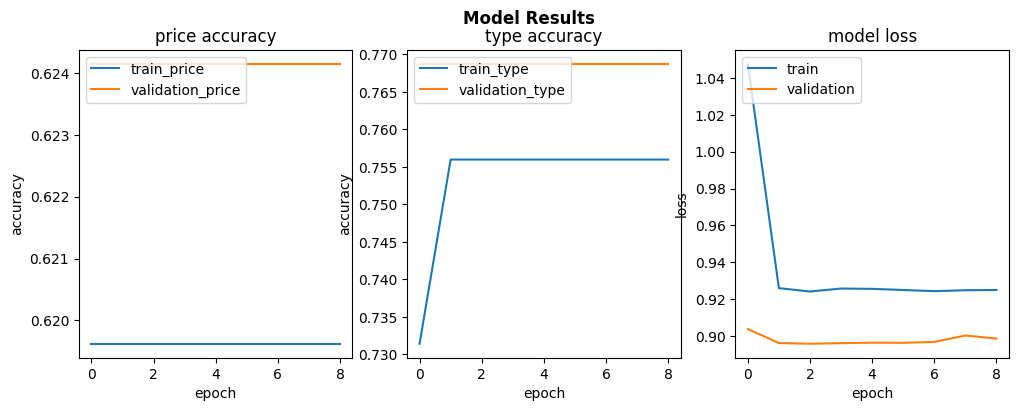

In [ ]:
visualization(history)

In [ ]:
# loading images:
x_test_image = np.array([load_image(i) for i in tqdm(test_data['image'])])

# loading summary: (force convert some of the non-string cell to string)
x_test_text = _preprocess(test_data['summary'].astype('str'))

  0%|          | 0/7360 [00:00<?, ?it/s]

In [ ]:
# we can do prediction on training set
y_predict = model.predict(
    {
        'summary': x_test_text,
        'image': x_test_image
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

230/230 [==============================] - 2s 7ms/step
[[0.6432998  0.29357794 0.06312227]
 [0.6432998  0.29357794 0.06312227]
 [0.6432998  0.29357794 0.06312227]
 ...
 [0.6432998  0.29357794 0.06312227]
 [0.6432998  0.29357794 0.06312227]
 [0.6432998  0.29357794 0.06312227]]
[0 0 0 ... 0 0 0]


In [ ]:
#if for kaggle competition and it is about (price prediction)
pd.DataFrame(
    {'id': test_data.index,
     'price': price_category_predicted}
).to_csv('trail5.csv', index=False)

* this model have a price accuracy of 0.6196 and a validation accuracy of 0.6241 in training.
* this model have a type accuracy of 0.7560 and a validation accuracy of 0.7688 in training.
* on kaggle this model has an accuracy of 0.5842 in public score.

### trial 6 bouns vgg19:
* transfer learning model with our problem(VGG 19).
* Using it having some adventages includes saving of resources and improved efficiency when training new models hence we expect some enhancement in performance.



In [ ]:
# loading images:
x_train_image = np.array([load_image(i) for i in tqdm(train_data['image'])])

# loading summary: (force convert some of the non-string cell to string)
x_train_text = train_data['translate_text'].astype('str')


  0%|          | 0/7326 [00:00<?, ?it/s]

In [ ]:
from tensorflow.keras.applications import VGG19

# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
# simple average of embedding.
embedded = keras.layers.Embedding(tokenizer.num_words, 300)(in_text)
averaged = tf.reduce_mean(embedded, axis=1)


# image part 
# simple conv2d. 
cov1 = Conv2D(10,(16,16), activation='tanh')(in_image) # 10 number of filters  and  (16, 16) size of filter
vgg=VGG19(weights=None, input_shape=(49, 49, 10), include_top=False)(cov1)
flattened = Flatten()(vgg)

# fusion - combinig both
fused = tf.concat([averaged, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model_2= keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    },
)


# compile model with optimizer, loss values for each task, loss 
# weights for each task.
model_2.compile(
    optimizer=Adam(0.001),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.5,
        'price': 0.5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model_2.summary()

/usr/local/lib/python3.9/dist-packages/keras/applications/vgg19.py:137: UserWarning: This model usually expects 1 or 3 input channels. However, it was passed an input_shape with 10 input channels.
  input_shape = imagenet_utils.obtain_input_shape(


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 conv2d_1 (Conv2D)              (None, 49, 49, 10)   5130        ['input_4[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 300, 300)     13500000    ['input_3[0][0]']                
                                                                                            

In [ ]:
history = model_2.fit(
    x={
        'summary': x_train_text_id,
        'image': x_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=30,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=5 )
    ],
    verbose=1
)
     

Epoch 1/30
367/367 [==============================] - 19s 52ms/step - loss: 0.9636 - price_loss: 0.8372 - type_loss: 1.0899 - price_sparse_categorical_accuracy: 0.6196 - type_sparse_categorical_accuracy: 0.7560 - val_loss: 0.8905 - val_price_loss: 0.8214 - val_type_loss: 0.9596 - val_price_sparse_categorical_accuracy: 0.6241 - val_type_sparse_categorical_accuracy: 0.7688
Epoch 2/30
367/367 [==============================] - 17s 48ms/step - loss: 0.9075 - price_loss: 0.8228 - type_loss: 0.9922 - price_sparse_categorical_accuracy: 0.6205 - type_sparse_categorical_accuracy: 0.7560 - val_loss: 0.8757 - val_price_loss: 0.8089 - val_type_loss: 0.9424 - val_price_sparse_categorical_accuracy: 0.6241 - val_type_sparse_categorical_accuracy: 0.7688
Epoch 3/30
367/367 [==============================] - 17s 47ms/step - loss: 0.8868 - price_loss: 0.7989 - type_loss: 0.9746 - price_sparse_categorical_accuracy: 0.6249 - type_sparse_categorical_accuracy: 0.7560 - val_loss: 0.8537 - val_price_loss: 0.77

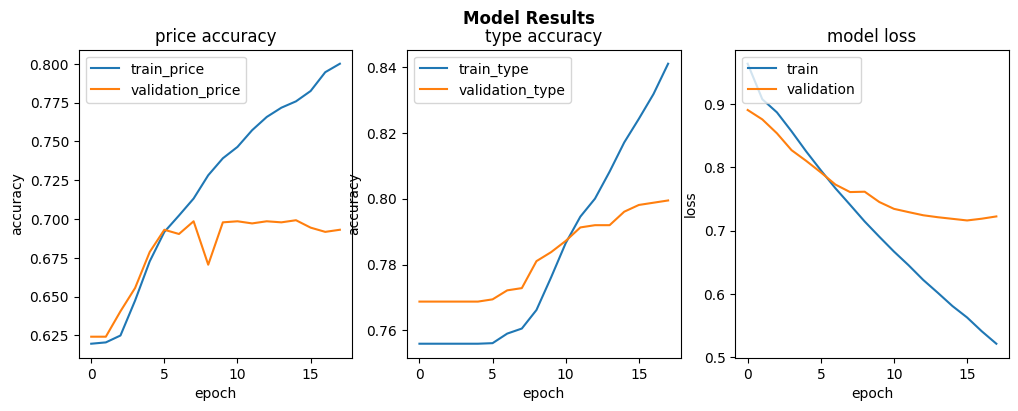

In [ ]:
visualization(history)

In [ ]:
# loading images:
x_test_image = np.array([load_image(i) for i in tqdm(test_data['image'])])

# loading summary: (force convert some of the non-string cell to string)
x_test_text = _preprocess(test_data['summary'].astype('str'))

  0%|          | 0/7360 [00:00<?, ?it/s]

In [ ]:
# we can do prediction on training set
y_predict = model_2.predict(
    {
        'summary': x_test_text,
        'image': x_test_image
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

230/230 [==============================] - 4s 13ms/step
[[0.8322232  0.12514974 0.04262711]
 [0.65623474 0.27789298 0.06587224]
 [0.3451027  0.44955817 0.20533913]
 ...
 [0.8667472  0.11169787 0.02155486]
 [0.99221426 0.0054684  0.0023174 ]
 [0.8704049  0.1083209  0.02127418]]
[0 0 1 ... 0 0 0]


In [ ]:
#if for kaggle competition and it is about (price prediction)
pd.DataFrame(
    {'id': test_data.index,
     'price': price_category_predicted}
).to_csv('trail6-1.csv', index=False)

* this model have a price accuracy of 0.8000 and a validation accuracy of 0.6930 in training.
* this model have a type accuracy of 0.8410 and a validation accuracy of 0.7995 in training.
* on kaggle this model has an accuracy of 0.64266 in public score.

### new data preprocessing:
* In this trial we will use different preprocessing on the text with applying the translation.
* remove_stopwords, remove_extra_white_spaces, lemmatizing , tokenization and converting to integer IDs

In [ ]:
#taking copy from origional data
train_new = train_data.copy()
test_new = test_data.copy()
#drop the missing data points
train_data.dropna(inplace=True) 

In [ ]:
# some text cleaning functions
def convert_to_lower(text):
    return text.lower()

def remove_numbers(text):
    number_pattern = r'\d+'
    without_number = re.sub(pattern=number_pattern, repl=" ", string=text)
    return without_number

def lemmatizing(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        lemma_word = lemmatizer.lemmatize(tokens[i])
        tokens[i] = lemma_word
    return " ".join(tokens)

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_stopwords(text):
    removed = []
    stop_words = list(stopwords.words("english"))
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        if tokens[i] not in stop_words:
            removed.append(tokens[i])
    return " ".join(removed)

def remove_extra_white_spaces(text):
    single_char_pattern = r'\s+[a-zA-Z]\s+'
    without_sc = re.sub(pattern=single_char_pattern, repl=" ", string=text)
    return without_sc

In [ ]:
# loading images:
x_train_image = np.array([load_image(i) for i in tqdm(train_new['image'])])

# loading summary: (force convert some of the non-string cell to string)
x_train_text = train_new['translate_text'].astype('str')


  0%|          | 0/7326 [00:00<?, ?it/s]

In [ ]:
x_train_text = train_new['translate_text'].apply(lambda x: remove_stopwords(x))
x_train_text = train_new['translate_text'].apply(lambda x: remove_extra_white_spaces(x))
x_train_text = train_new['translate_text'].apply(lambda x: lemmatizing(x))

In [ ]:
# preprocess and tokenize list of training sequences(padding is done inside): 
x_train_text_id = _preprocess(x_train_text) 

### trial 7 multi-objective model (predicting both price and type):
* this model will use the new preprocessed data and will be the same as the previous model except that it will show the prediction of both type and price.


In [ ]:
# here we have two inputs. one for image and the other for text.
in_text = keras.Input(batch_shape=(None, max_len))
in_image = keras.Input(batch_shape=(None, 64, 64, 2))

# text part
# simple average of embedding. 
embedded = keras.layers.Embedding(tokenizer.num_words, 300)(in_text)
averaged = tf.reduce_mean(embedded, axis=1)

# image part 
# simple conv2d.
cov1 = Conv2D(10, (16, 16) , activation='relu')(in_image) # 10 number of filters and  (16, 16) size of filter
dropout = Dropout(.4)(cov1)
pl = MaxPool2D((16, 16))(dropout)
flattened = Flatten()(pl)

# fusion - combinig both
fused = tf.concat([averaged, flattened], axis=-1)

# multi-task learning (each is a multi-class classification)
# one dense layer for each task
p_type = Dense(len_type, activation='softmax', name='type')(fused)
p_price = Dense(len_price, activation='softmax', name='price')(fused)


# define model input/output using keys.
model = keras.Model(
    inputs={
        'summary': in_text,
        'image': in_image
    },
    outputs={
        'type': p_type,
        'price': p_price,
    }
)


# compile model with optimizer, loss values for each task, 
# loss weights for each task.
model.compile(
    optimizer=Adam(.001),
    loss={
        'type': 'sparse_categorical_crossentropy',
        'price': 'sparse_categorical_crossentropy',
    },
    loss_weights={
        'type': 0.5,
        'price': 0.5,       
    },
    metrics={
        'type': ['SparseCategoricalAccuracy'],
        'price': ['SparseCategoricalAccuracy'],
    },
)


model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 64, 64, 2)]  0           []                               
                                                                                                  
 conv2d_2 (Conv2D)              (None, 49, 49, 10)   5130        ['input_7[0][0]']                
                                                                                                  
 input_6 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 dropout_2 (Dropout)            (None, 49, 49, 10)   0           ['conv2d_2[0][0]']               
                                                                                            

In [ ]:
history = model.fit(
    x={
        'summary': x_train_text_id,
        'image': x_train_image
    },
    y={
        'type': y_train_type,
        'price': y_train_price,
    },
    epochs=15,
    batch_size=16,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_price_loss', patience=10)
    ],
    verbose=1
)

Epoch 1/15
367/367 [==============================] - 6s 14ms/step - loss: 1.0592 - price_loss: 0.8566 - type_loss: 1.2618 - price_sparse_categorical_accuracy: 0.6184 - type_sparse_categorical_accuracy: 0.7543 - val_loss: 0.8953 - val_price_loss: 0.8300 - val_type_loss: 0.9605 - val_price_sparse_categorical_accuracy: 0.6241 - val_type_sparse_categorical_accuracy: 0.7688
Epoch 2/15
367/367 [==============================] - 5s 12ms/step - loss: 0.9071 - price_loss: 0.8209 - type_loss: 0.9932 - price_sparse_categorical_accuracy: 0.6200 - type_sparse_categorical_accuracy: 0.7560 - val_loss: 0.8735 - val_price_loss: 0.8035 - val_type_loss: 0.9435 - val_price_sparse_categorical_accuracy: 0.6241 - val_type_sparse_categorical_accuracy: 0.7688
Epoch 3/15
367/367 [==============================] - 4s 12ms/step - loss: 0.8866 - price_loss: 0.7968 - type_loss: 0.9763 - price_sparse_categorical_accuracy: 0.6265 - type_sparse_categorical_accuracy: 0.7560 - val_loss: 0.8587 - val_price_loss: 0.7867 

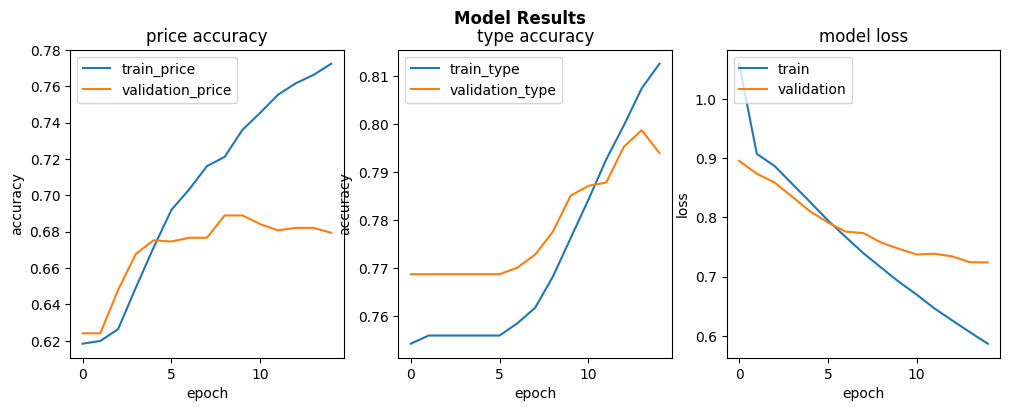

In [ ]:
visualization(history)

In [ ]:
# loading images:
x_test_image = np.array([load_image(i) for i in tqdm(test_new['image'])])

# loading summary: (force convert some of the non-string cell to string)
x_test_text = test_new['translate_text'].astype('str')

  0%|          | 0/7360 [00:00<?, ?it/s]

In [ ]:
x_test_text = x_test_text.apply(lambda x: remove_stopwords(x))
x_test_text = x_test_text.apply(lambda x: remove_extra_white_spaces(x))
x_test_text = x_test_text.apply(lambda x: lemmatizing(x))
x_test_text = _preprocess(x_test_text)

In [ ]:
# we can do prediction on training set
y_predict = model.predict(
    {
        'summary': x_test_text,
        'image': x_test_image
    }
)


# probabilities
price_predicted = y_predict['price']
print(price_predicted)

# categories
price_category_predicted = np.argmax(price_predicted, axis=1)
print(price_category_predicted)

print("//////////////////////////////////////////////////////////////////")
# probabilities
type_predicted = y_predict['type']
print(type_predicted)

# categories
type_category_predicted = np.argmax(type_predicted, axis=1)
print(type_category_predicted)

230/230 [==============================] - 1s 4ms/step
[[0.06549364 0.856251   0.07825533]
 [0.39695945 0.5365924  0.06644813]
 [0.6165365  0.3475644  0.0358991 ]
 ...
 [0.69242984 0.2648291  0.04274104]
 [0.69242984 0.2648291  0.04274104]
 [0.69242984 0.2648291  0.04274104]]
[1 1 0 ... 0 0 0]
//////////////////////////////////////////////////////////////////
[[6.59420402e-05 9.24204528e-01 6.38920348e-04 ... 1.15845156e-04
  3.12844012e-03 7.98099572e-05]
 [2.34934036e-04 5.87523639e-01 2.68145883e-03 ... 4.30958316e-04
  1.62602421e-02 3.92042479e-04]
 [1.11120418e-04 8.69616151e-01 2.44017597e-03 ... 2.58223270e-04
  1.39611559e-02 2.90744414e-04]
 ...
 [3.21015192e-04 7.72136092e-01 4.89614671e-03 ... 5.29857294e-04
  2.67144367e-02 5.98389714e-04]
 [3.21015192e-04 7.72136092e-01 4.89614671e-03 ... 5.29857294e-04
  2.67144367e-02 5.98389714e-04]
 [3.21015192e-04 7.72136092e-01 4.89614671e-03 ... 5.29857294e-04
  2.67144367e-02 5.98389714e-04]]
[1 1 1 ... 1 1 1]


In [ ]:
#if for kaggle competition and it is about (price prediction)
pd.DataFrame(
    {'id': test_new.index,
     'price': price_category_predicted}
).to_csv('trail7.csv', index=False)

* this model have a price accuracy of 0.7724 and a validation accuracy of 0.6794 in training.
* this model have a type accuracy of 0.8126 and a validation accuracy of 0.7940 in training.
* on kaggle this model has an accuracy of 0.4942 in public score.